In [4]:
import pandas as pd
df = pd.read_csv('climate_action_data.csv')

In [6]:
#structure of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB
None


In [7]:
#checking for missing values
print(df.isnull().sum())

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [ ]:
#data types
print(df.dtypes)

Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object


In [ ]:
#removing duplicate records
print(df.drop_duplicates)

<bound method DataFrame.duplicated of     Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0    SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1    SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2    SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3    SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4    SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   
..        ...         ...              ...     ...            ...         ...   
908  SEN-1090  2025-04-01            18.37    7.03           21.0        47.1   
909  SEN-1201  2025-07-21            15.89     6.4           30.5        33.3   
910  SEN-1309  2025-11-06            28.96    5.04           20.5        47.6   
911  SEN-1339  2025-12-06            16.85    6.57           19.3        34.5   
912  SEN-1050  2025-02-20            77.87    4.73           18.6      

In [21]:
#replacimg erroneous values with NaN
df.replace('error', pd.NA, inplace=True)

In [22]:
#handling missing data
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(df[col].median())
        
categorical_columns = ['Sensor_ID', 'Date', 'Crop_Type', 'Drone_Image_ID']
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])
        
print("Missing values after handling")
df.isnull().sum()

Missing values after handling


Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [23]:
print(df.describe())

       Soil_Moisture(%)     Soil_pH  Temperature(C)  Humidity(%)  \
count        913.000000  913.000000      913.000000   913.000000   
mean          44.474014    6.255854       26.405586    60.091566   
std           20.570061    1.023586        4.917604    17.513384   
min           10.350000    4.520000       18.000000    30.000000   
25%           26.610000    5.330000       22.100000    45.900000   
50%           45.185000    6.295000       26.600000    59.400000   
75%           62.330000    7.100000       30.600000    75.300000   
max           79.980000    8.000000       35.000000    89.900000   

       Fertilizer_Recommended(kg/ha)  Irrigation_Recommended(mm)  
count                     913.000000                  913.000000  
mean                       87.652245                   17.415334  
std                        34.609759                    7.086385  
min                        30.000000                    5.000000  
25%                        58.500000                

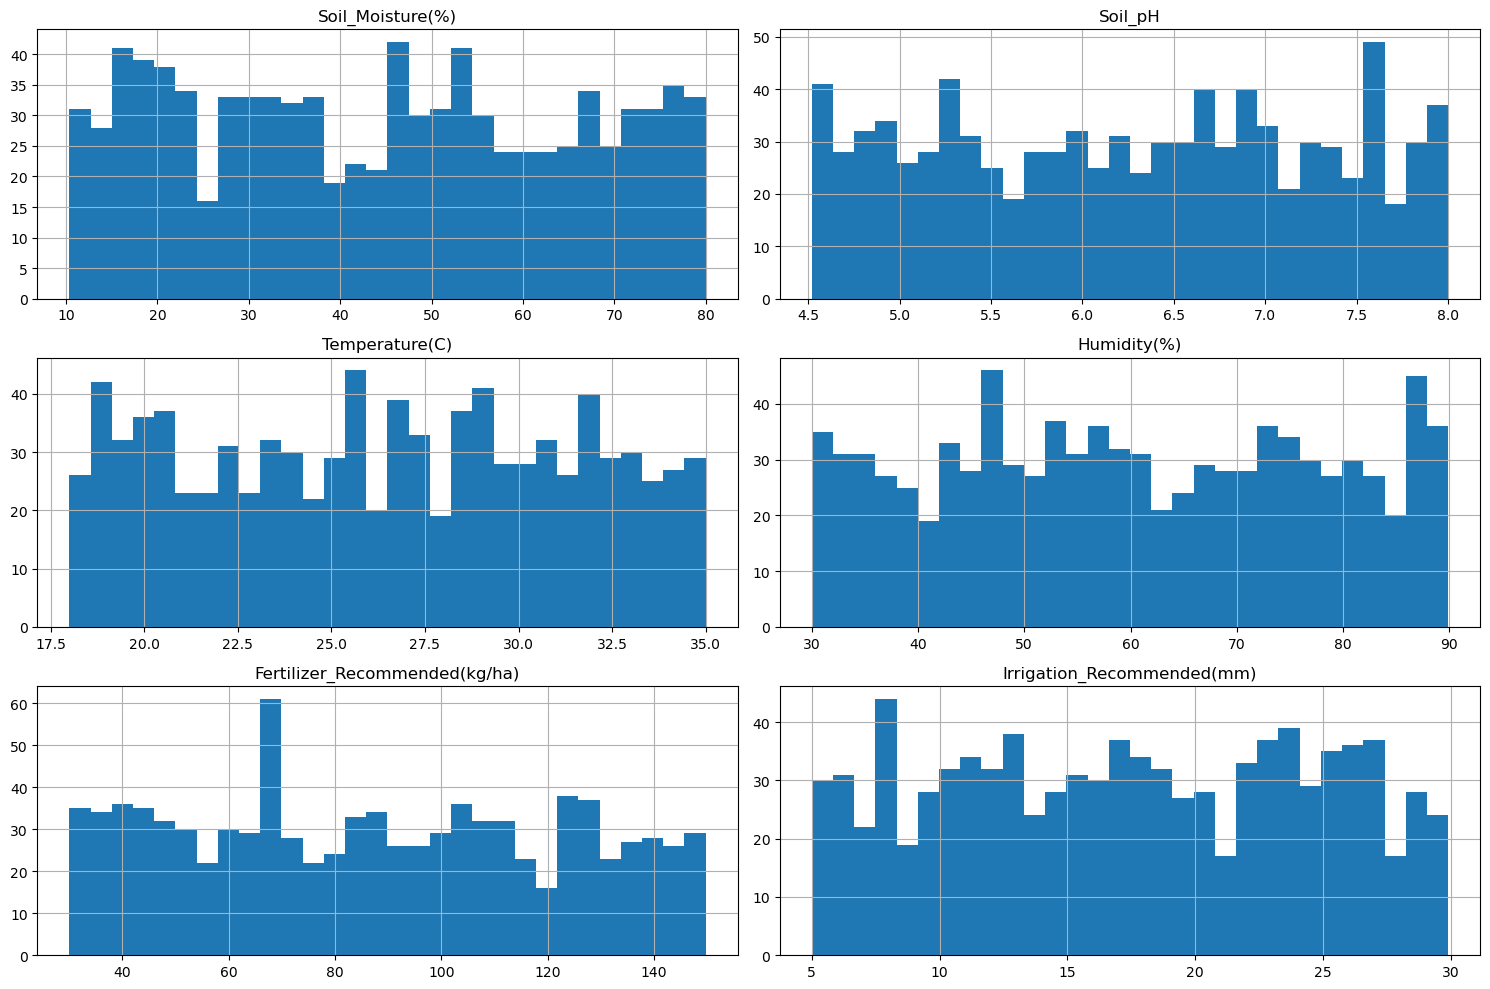

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

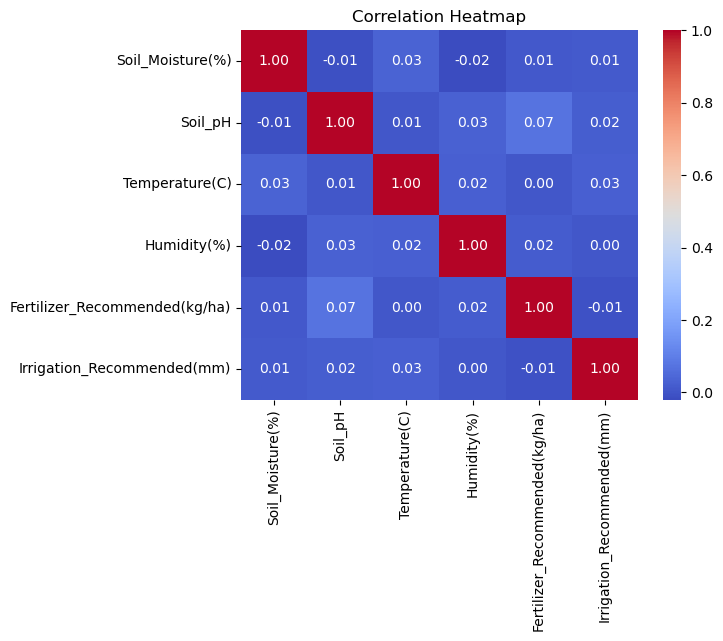

Variable that most influences fertilizer recommendations is Soil pH


In [36]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.Figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

print('Variable that most influences fertilizer recommendations is Soil pH')

In [28]:
highest_moisture_crop = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().idxmax()
highest_moisture_value = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().max()

print('Crop type with highest average soil moisture: ' +highest_moisture_crop)


Crop type with highest average soil moisture: Wheat


In [32]:
high_temp_crops = df[df['Temperature(C)'] > 30]
unique_crop_types = high_temp_crops['Crop_Type'].unique()

print(unique_crop_types)

print('''
      Appropriate irrigation adjustments for crops experiencing average temperatures above 30°C
      - Increase the frequency of irrigation
      - Adjust the irrigation volume
      - Mulching
      - Fertilization adjustments
      ''')

['Lettuce' 'Maize' 'Wheat' 'Tomatoes' 'Beans']

      Appropriate irrigation adjustments for crops experiencing average temperatures above 30°C
      - Increase the frequency of irrigation
      - Adjust the irrigation volume
      - Mulching
      - Fertilization adjustments
      


In [38]:
df.to_csv('cleaned_precision_agriculture_data.csv', index= False)

print('''
     insights  
     - soil moisture correlates positively and slightly with fertizer recommended and irrigation recommended
     - soil ph displays some weak correlation with temperature and humidity
     - temperature has a slight correlation with soil moisture and fertilizer recommended
     
     recommendations
     - focus on soil moisture
     - consider ph balance
     - monitor temperature and humidity
     
      ''')


     insights  
     - soil moisture correlates positively and slightly with fertizer recommended and irrigation recommended
     - soil ph displays some weak correlation with temperature and humidity
     - temperature has a slight correlation with soil moisture and fertilizer recommended
     
     recommendations
     - focus on soil moisture
     - consider ph balance
     - monitor temperature and humidity
     
      
